# 1. Neural Network Basics - Logical Gates
## Introduction
Learning Deep Learning can be a comprehensive task. There exists a wide range of different frameworks, and the discipline is very heavy on mathematics. It is therefore pretty challenging to know exactly were to start. 

Several companies, including Microsoft and Google, have made easy-to-use services for Deep Learning available like for example Microsoft Cognitive Services. While these are a perfect way to add smartness to your applications based on Deep Learning, these services are a black box making it very hard to know how it actually works. 

On the other and there exists several frameworks to start making Nerual Networks from the ground up. Like Keras, PyTorch and Tensorflow. While these a very heavy framework, there seems to be a lack of literature and material to teach people how Neural Networks actually functions. One infamous “Hello World”-example is the Iris classification problem, where one is going to determine the spieces of a plant based on a set of attributes like for example size, colour etc. While this example is perfect to learn of classification in general works, it is not good for learning how the Nerual Network in itself is working in order to solve classification problems. 

 In this series of papers, I will try to teach Deep Learning from a different perspective, in order to better understand how the Nerual Network works.


## What is an Artificial Neural Network?
In order to understand how an Artifical Network works, we first have to understand what it really is. Both as a concept and from a Computer Science perspective.

#### Conceptually 
As a concept, an Artificial Neural Network is trying to model and emulate the neural network found in animal brains. Which is a vast network of single neurons, a cell, that has inputs and outputs. Sensory inputs from the body’s senses will pass through this network, and result in an actions. For example when getting exposed for strong light, the eyes will automatically close, since there is a circuit for it inside the network. The more the network is exposed for the same sensory input, the more “trained” it becomes. As the connection between the neurons is getting stronger, and becomes a more likely path. When speaking of Artifical Neural Networks, this is the “weights” of the inputs. 

#### From a Data Science Perspective
From a Computer Science perspective, Artificial Neural Networks are very interesting. If we take a look at Computer Science as a whole, Artificial Neural Networks is only one of many others network types for computation.

NAND-networks is maybe the most important one, and it is the fundament of nearly all computers today. By combining NAND-gates in a network, it is possible to create any type of logical gates, such as AND, OR, XOR etc. And such network is then considered **computationally universal**. Such property is called **Turing Completeness**.

It turns out, that an Artificial Neural Network also has the property of being Turing Complete. 



## Making Logical Gates with Artifical Neural Network
With the NAND-network in mind. One great place to start exploring Neural Networks would be to create logical gates and see how it differs from conventional logical circuits. In this paper we will explore creating **AND**, **OR** and **NAND** gates. 

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [19]:
columns = ['a', 'b', 'c']

df = pd.DataFrame([[0,0,0], [0,1,1], [1,0,1], [1,1,1]], columns=columns)
X = df.iloc[:,0:2]
y = df.iloc[:, 2]


print(df)

   a  b  c
0  0  0  0
1  0  1  1
2  1  0  1
3  1  1  1


In [20]:
def plot_data(pl, X, y):
    x1 = X.iloc[:,0]
    x2 =  X.iloc[:,1]
    pl.subplots()
    pl.scatter(x1, x2)

    for i, txt in enumerate(y):
        pl.annotate(txt, (x1[i], x2[i]))

    return pl

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))

    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)

    plot_data(plt, X, y)

    return plt

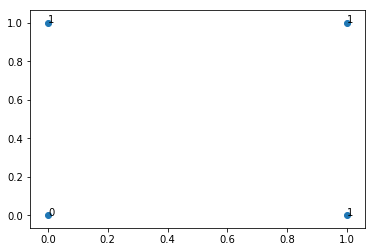

In [21]:
plot_data(plt, X, y).show()

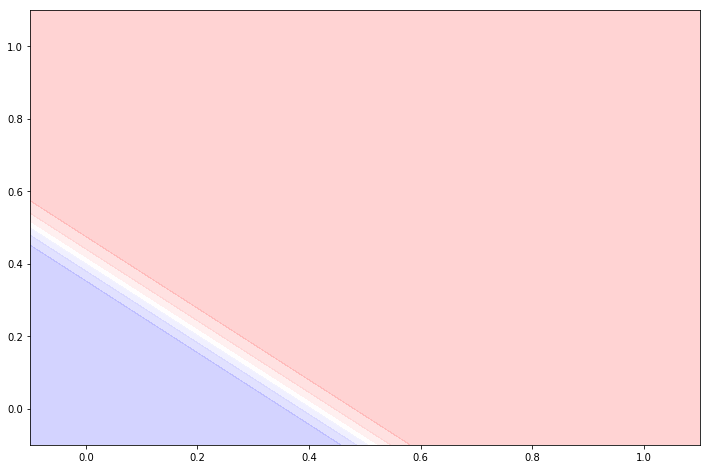

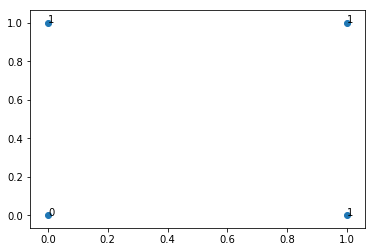

In [25]:

model = Sequential()
model.add(Dense(100, input_shape=(2,), activation="tanh"))
model.add(Dense(1, input_shape=(8,), activation="sigmoid"))

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=1000, verbose = 0)

model.predict_proba(X)

plot_decision_boundary(model, X, y).show()